In [1]:
# todo list

# generalized skewed error distribution
# skewness and kurtosis formulas for skewed t distribution

# uniform & exponential distribution
# uniform and exponential distribution
# fix binary incompatibility error

# typing questions
# cases where user pases 2d array in fit method?
# returning pandas series when passed?
# input handling / make professional
# does _conditional_cdf need adj?

# rotation error handling archimedean copula

# standard errors for mixture models / EM algo
# NormalMixture log likelihood / aic / bic / standard errors after EM algo?
# quantile dependance functions override

# fix quantile dependance for scalar inputs

# holding parameters constant?

# method of moments optimization
# refine typing rules / checks

# joint model:
# CMLE & Inference on Margins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import special


import importlib
from copulas import bivariate_copula
import base, copulas, marginals, utils, tests, plots, joint_model, mixture

from copulas import archimedean

importlib.reload(base)
importlib.reload(utils)
importlib.reload(marginals.marginals)
importlib.reload(marginals.mixture)
importlib.reload(marginals.parametric)
importlib.reload(marginals)
importlib.reload(copulas)

importlib.reload(copulas.elliptical)
importlib.reload(plots)
importlib.reload(plots.model_plots)
importlib.reload(joint_model)
importlib.reload(mixture)

from joint_model import JointModel

plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi'] = 75

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#x = np.random.exponential(size = 10_000)

#quantile = np.quantile(x, 0.05)
#cvar = np.mean(x[x <= quantile])

#print(cvar)

#m._params_to_cvar(1, alpha = 0.05)

In [3]:
#m = marginals.NormalVarianceMix(scale2 = 2)

#print(m.summary())

In [10]:
c = copulas.NormalMix(p1 = 0.25, Q1 = 0.75, Q2 = 0.25)



<AxesSubplot:>

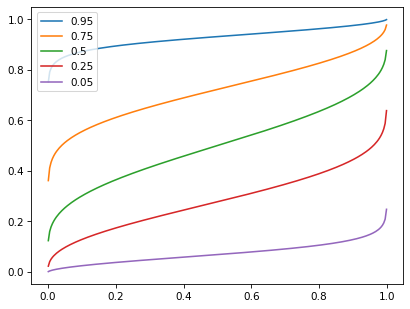

In [11]:
plots.copula_quantile_curves(c)

<AxesSubplot:>

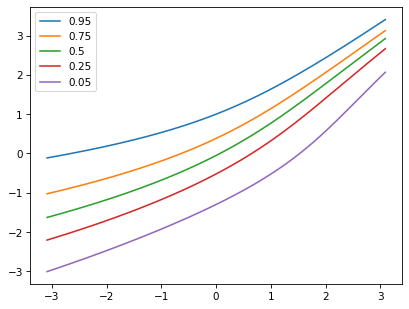

In [4]:
#copula = copulas.NormalMix(Q1 = 0.5, Q2 = -0.5)
#copula = copulas.Normal(Q = 0.9)
copula = copulas.Gumbel(theta = 2)
#copula = copulas.Gumbel(theta = 4, rotation = 90)
#copula = copulas.Normal(Q = 0.5)
#copula = copulas.Frank(theta = 4)

#plots.copula_quantile_curves(copula)
#ax = plots.copula_3d_surf(copula, elev = 25, azim = 120, range_num = 250, cmap = "viridis")
#plots.copula_scatter(copula)

model = JointModel(copula = copula,
                   marginal1 = marginals.Normal(),
                   marginal2 = marginals.Normal())

plots.joint_quantile_curves(model, adj = 1e-3)
#plots.joint_scatter(model, alpha = 0.5)

<AxesSubplot:>

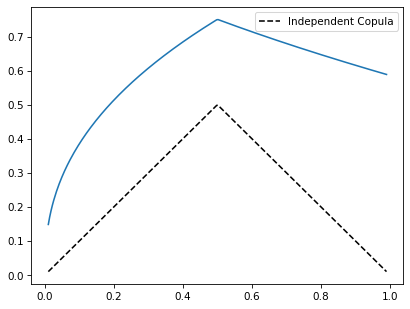

In [5]:
plots.copula_quantile_dependance(copula)

In [9]:
#copula.conditional_ppf(0.5, 0.25)

In [10]:
#adj = 1e-6
#q = 0.25
#u1 = 0.5

#print(copula.conditional_cdf(u1, adj, adj = adj) - q)
#print(copula.conditional_cdf(u1, 1 - adj, adj = adj) - q)

#q_range = np.linspace(adj, 1 - adj, 100)

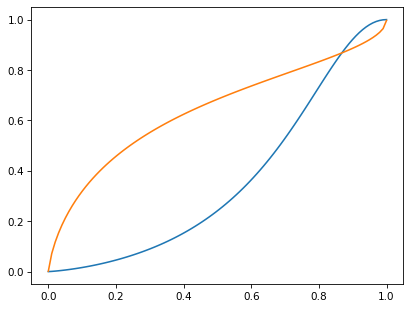

In [11]:

q = utils.get_u_range()
u1 = np.full(q.shape, fill_value = 0.75)

f, ax = plt.subplots()
ax.plot(q, copula.conditional_cdf(u1, q))
ax.plot(q, copula.conditional_ppf(u1, q))

In [12]:
copula.conditional_cdf(0.5, 0.25)

0.18985474678450892

In [13]:
copula.conditional_ppf(0.5, 0.21803)

0.27455450224091005

In [14]:
#plots.copula_scatter(copula, n = 2000, alpha = 0.25)

In [15]:
#print(copula.summary())

#m = marginals.StandardSkewedT(eta = 10, lam = 0.5)
#m = marginals.NormalMixture(p1 = 0.5, mu1 = 0, mu2 = 0, sigma1 = 1/2, sigma2 = 2)

#m = marginals.StudentsT(df = 5)
#m = marginals.StandardSkewedT(eta = 10, lam = 0.5)|
#m = marginals.StudentsT()
#print(m.summary())

#m1 = marginals.NormalVarianceMix(p1 = 0.5, sigma1 = 0.5, sigma2 = 2)
#print(m1.summary())

#m1 = marginals.NormalVarianceMix(sigma1 = 0.5)

#m = marginals.StandardSkewedT(eta = 4, lam = -0.75)
#m = marginals.StudentsT(df = 9)

#m = marginals.NormalMix(p1 = 0.5, loc1 = 1, scale1 = 1, scale2 = 4)

#m = marginals.StudentsT(df = 10, scale = 1)
m = marginals.SkewNormal(scale = 1, shape = 0)

In [16]:
print(m.summary())

                       Marginal Distribution Summary                       
Model Name:                SkewNormal   Log-Likelihood:                 nan
Model Family:              Parametric   AIC:                            nan
Esimation Method:                 nan   BIC:                            nan
Num. Params:                        3   Mean:                         0.000
Num. Obs:                         nan   Std. Dev:                     1.000
Date:                Wed, Aug 07 2024   Skewness:                     0.000
Time:                        20:40:28   Excess Kurtosis:              0.000
                                                                           
                                                                           
                            Parameter Estimates                            
             coef    std err       h0          t       P>|t| 95% Conf. Int.
---------------------------------------------------------------------------
loc         

In [17]:
#%timeit m._get_upper_lower_bound(*m.params)

In [18]:
m.cdf(-5)

2.8665157187919333e-07

[]

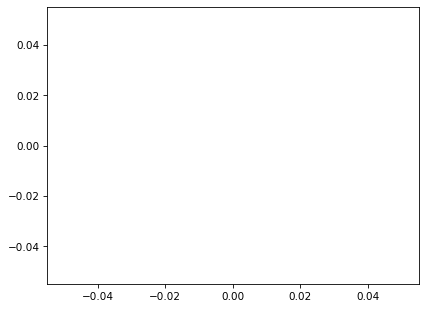

In [19]:
f, ax = plt.subplots()

ax.plot()

In [203]:
m2 = marginals.StandardSkewedT()
m2.fit(x)

In [204]:
print(m2.summary())

                       Marginal Distribution Summary                       
Model Name:           StandardSkewedT   Log-Likelihood:           -2240.619
Model Family:              Parametric   AIC:                       2244.619
Esimation Method:                 MLE   BIC:                       4496.440
Num. Params:                        2   Skewness:                    -2.780
Num. Obs:                        2000   Excess Kurtosis:             16.155
Date:                Wed, Apr 03 2024   95% VaR:                     -1.772
Time:                        21:12:05   95% CVaR:                    -3.004
                                                                           
                                                                           
                             Parameter Estimates                             
             coef    std err       h0          t       P>|t|   95% Conf. Int.
-----------------------------------------------------------------------------
eta   

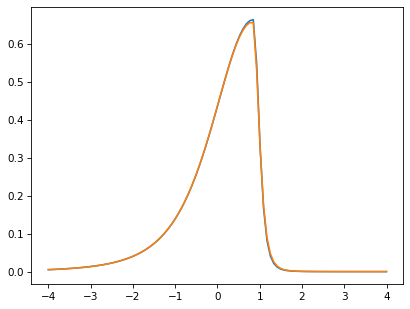

In [205]:
x_range = np.linspace(-4, 4, 100)

plt.plot(x_range, m.pdf(x_range))
plt.plot(x_range, m2.pdf(x_range))

In [115]:
print(m2.skewness)
print(m2.kurtosis)

nan
nan


In [1823]:
new_m = marginals.CenteredNormal()

simulated_x = m.simulate()

new_m.fit(simulated_x)

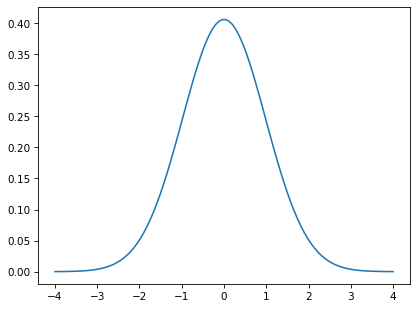

In [1762]:
f, ax = plt.subplots()
ax.plot(x, new_m.pdf(x))

In [1763]:
print(new_m.summary())

                       Marginal Distribution Summary                       
Model Name:            CenteredNormal   Log-Likelihood:          -1401.4656
Model Family:              Parametric   AIC:                      1403.4656
Estimation Method:                MLE   BIC:                      2816.7468
Num. Params:                        1   Skewness:                    0.0000
Num. Obs:                        1000   Excess Kurtosis:             0.0000
Date:                Sat, Mar 30 2024   95% VaR:                    -1.6164
Time:                        17:09:51   95% CVaR:                   -2.0270
                                                                           
                                                                           
                             Parameter Estimates                             
             coef    std err       h0          t       P>|t|   95% Conf. Int.
-----------------------------------------------------------------------------
sigma 

<Axes3DSubplot:>

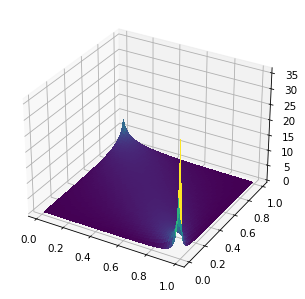

In [515]:
plots.copula_3d_surf(copula)

<AxesSubplot:>

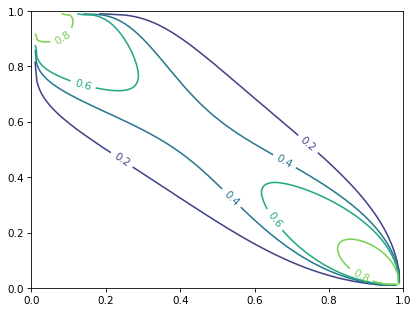

In [516]:
plots.copula_contour(copula, pdf, range_num = 200)

<AxesSubplot:>

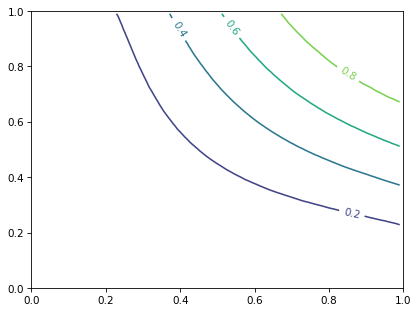

In [517]:
plots.copula_contour(copula, cdf, range_num = 100)

<AxesSubplot:>

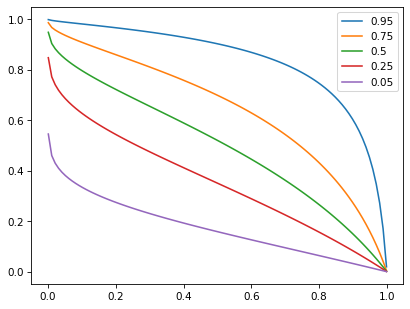

In [518]:
plots.copula_quantile_curves(copula)

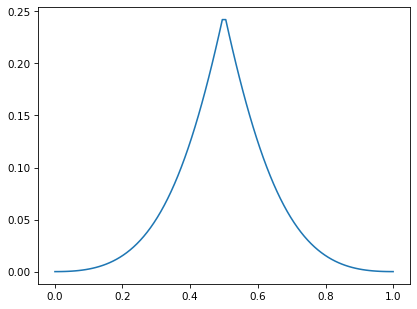

In [519]:
q_range = utils.get_u_range(adj = 1e-3)
plt.plot(q_range, copula.quantile_dependance(q_range, adj = 1e-3))

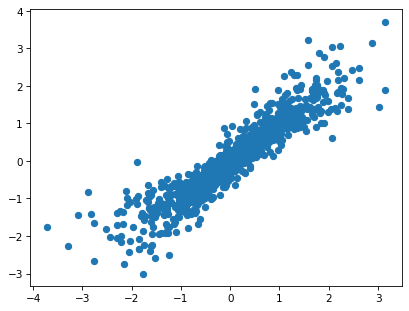

In [520]:
m = model.BivariateModel(copula = bivariate.Frank(theta = 20), 
                        marginal1 = marginals.Normal(), 
                        marginal2 = marginals.Normal())


x1, x2 = m.simulate()

f, ax = plt.subplots()
ax.scatter(x1, x2)

In [588]:
#ax = plots.quantile_dependance(u1_sim, u2_sim, copula = copula, copula_label = "StudentsT Model", 
#                               show_indep = True, boot = True)

In [589]:
#marginal1 = marginals.StandardSkewedT(eta = 30, lam = 0.5)


#x_range = utils.get_x_range()
#u_range = utils.get_u_range()

#plt.plot(x_range, marginal1.pdf(x_range))
#plt.plot(x_range, marginal1.cdf(x_range))
#plt.plot(u_range, marginal1.ppf(u_range))

In [590]:
#marginal2 = marginals.StandardSkewedT()
marginal2 = marginals.StandardSkewedT()

data = marginal1.simulate(seed = 1, n = 1000)
marginal2.fit(data, robust_cov = True)

print(marginal2.summary())

NameError: name 'marginal1' is not defined

In [263]:
#marginal2 = marginals.StandardSkewedT()
marginal2 = marginals.Normal()

data = marginal1.simulate(seed = 1, n = 1000)
marginal2.fit(data, robust_cov = True)

print(marginal2.summary())

                       Marginal Distribution Summary                       
Model Name:                    Normal   Log-Likelihood:          -1426.3500
Method:                           MLE   AIC:                      1430.3500
Num. Params:                        2   BIC:                      2866.5156
Num. Obs:                        1000                                      
Date:                Sun, Feb 11 2024                                      
Time:                        19:03:26                                      
                                                                           
                                                                           
                             Parameter Estimates                              
             coef    std err       h0          t       P>|t|    95% Conf. Int.
------------------------------------------------------------------------------
mu         0.0169     0.0319     0.00     0.5292      0.5968 [-0.0457, 0.0794]


In [235]:
#model = bivariate.StudentT(df = 5, Q = 0.7)
#model = bivariate.BivariateNormalMix(Q1 = 0.5, Q2 = -0.25, p = 0.1, adj = 1e-2)
model1 = bivariate.StudentsT(Q = 0.5, df = 10)
#model2 = bivariate.Normal(Q = 0.5)

#model = bivariate.Clayton(alpha = 0.5)
#model = bivariate.Gumbel(delta = 1)

#model1 = bivariate.Normal(Q = 0.3)

In [37]:
#u1_sim, u2_sim = bivariate.StudentT(df = 5, Q = 0.9).simulate(n = 10000)

#model = bivariate.Gumbel(delta = 1.5)
#u1_sim, u2_sim = model2.simulate(n = 500)

#model2 = bivariate.StudentT()
#model2.fit(u1_sim, u2_sim)

u1_sim, u2_sim = model1.simulate(n = 500)

model2 = bivariate.StudentsT()
model2.fit(u1_sim, u2_sim)

In [38]:
print(model2.summary())

                           Bivariate Copula Summary                           
Model Name:                 StudentsT   Log-Likelihood:                78.3465
Model Family:              Elliptical   AIC:                          -74.3465
Method:                          CMLE   BIC:                         -144.2638
Num. Params:                        2   Kendall's Tau:                  0.3534
Num. Obs:                         500   Spearman's Rho:                    nan
Date:                Sun, Feb 11 2024   Upper Tail Depend.:                 NA
Time:                        11:24:04   Lower Tail Depend.:                 NA
                                                                              
                                                                              
                               Parameter Estimates                               
             coef    std err       h0          t       P>|t|       95% Conf. Int.
----------------------------------------------

In [39]:
#q_range = utils.get_u_range(5e-2, range_num = 100)

#f, ax = plt.subplots()
#ax.plot(q_range, np.where(q_range > 0.5, 1 - q_range, q_range))

#Q = -0.5
#models = [bivariate.Clayton(alpha = 0.5),
#          bivariate.Clayton(alpha = 1)]


#for model in models:
#    ax.plot(q_range, model.quantile_dependance(q_range))
    


In [40]:
#ax = plots.quantile_dependance(u1_sim, u2_sim, copula = model1, copula_label = "StudentsT Model", 
#                               show_indep = True, boot = True)

In [41]:
#print(model2.summary())

In [42]:
#marginal1 = marginals.StudentT(mean = 2, stdev = 1)
#x1 = marginal1.simulate(n = 1000)


#marginal2 = marginals.StudentT()
#marginal2.fit(x1)

In [43]:
#print(marginal2.summary())

In [44]:
#copula = bivariate.Clayton(alpha = 0.5)
#u1, u2 = utils.get_u_grid()

In [45]:
#plots.copula_3d_surf(copula, adj = 3e-2, azim = 150, elev = 30, cmap = "inferno")

In [46]:
#plots.copula_contour(copula, num_levels = 5)

In [47]:
#ax = plots.copula_quantile_curves(copula)

In [48]:
data = np.random.normal(size = 150)

In [49]:
marginal = marginals.GaussianKDE()

marginal.fit(data)

In [50]:
print(marginal.summary())

                       Marginal Distribution Summary                       
Model Name:               GaussianKDE   Bandwidth                    0.3671
Method:                         scott   Log-Likelihood:           -220.1374
Num. Params:                        1   AIC:                            nan
Num. Obs:                         150   BIC:                            nan
Date:                Sun, Feb 11 2024                                      
Time:                        11:24:09                                      
                                                                           
                                                                           


In [51]:
marginal = marginals.GaussianKDE()
marginal.fit(data)


x_range = np.linspace(np.min(data), np.max(data))

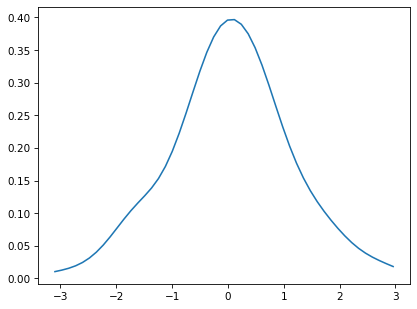

In [52]:
plt.plot(x_range, marginal.pdf(x_range))

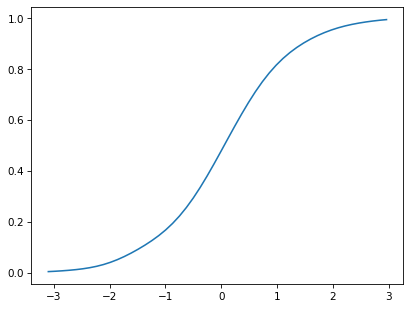

In [53]:
plt.plot(x_range, marginal.cdf(x_range))

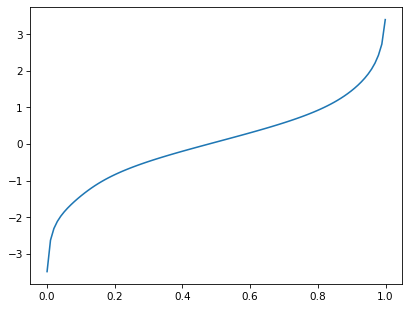

In [54]:
plt.plot(utils.get_u_range(), marginal.ppf(utils.get_u_range()))

In [177]:
marginal.ppf(0.999)

array(18.63322863)

In [240]:
def f(*params):
    return "Hello"

In [132]:
# Compute CDF by cumulatively summing the PDF values and normalizing
cdf_values = np.cumsum(pdf_values)
cdf_values /= cdf_values[-1]



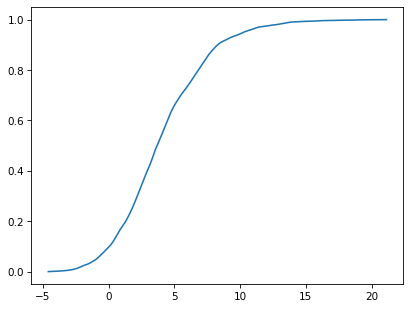

In [133]:
plt.plot(x_range, cdf_values)

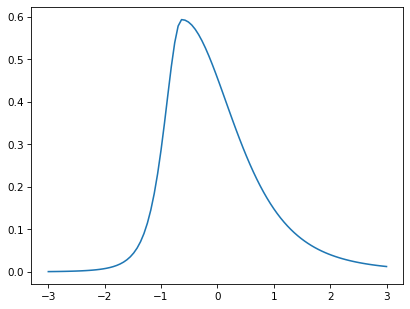

In [367]:
def skew_gen_t_pdf(x, mu, sigma, lam, p, q):
    
    # common terms
    beta_term1 = beta(1/p, q)
    beta_term2 = beta(2/q, q - 1/p)
    
    # v variable
    v1 = np.power(q, -1/p)
    v2 = 1 + 3 * np.power(lam, 2)
    v3 = beta(3/p, q - 2/p) / beta_term1
    v4 = (4 * np.power(lam, 2)) * np.power(beta_term2 / beta_term1, 2)
    v = v1 / np.sqrt(v2 * v3 - v4)
    
    
    # m variable
    sigma_term = 2 * sigma * v * np.power(q, 1/p)
    m = lam * sigma_term * beta_term2 / beta_term1
    
    
    # the final pdf
    x_term = x - mu + m
    pdf1 = sigma_term * beta_term1
    pdf2 = np.power(np.abs(x_term), p)
    pdf3 = q * np.power(v * sigma, p) * np.power(1 + lam * np.sign(x_term), p)
    
    fx = p / (pdf1 * np.power(1 + pdf2 / pdf3, 1/p + q))
    
    return fx
    
    
pdf2 = skew_gen_t_pdf(x_range, 0, 1, 0.5, 2, 2)
plt.plot(x_range, pdf2)



In [396]:
def find_x_bounds(loc, scale, pdf_func, *pdf_params, tol = 5e-4, expansion_factor = 0.5):
    
    
    step = expansion_factor * scale
    left_bound = -3 * scale + loc; right_bound = 3 * scale + loc

    
    while True:
        
        pdf_right = pdf_func(right_bound, *pdf_params)[0]
        pdf_left = pdf_func(left_bound, *pdf_params)[0]
        
        if pdf_left > tol:
            left_bound -= step
        
        if pdf_right > tol:
            right_bound += step
            
        print(left_bound, right_bound)
        if pdf_left < tol and pdf_right < tol:
            return left_bound, right_bound
        
        
loc = 0
scale = 1
df = 5
pdf_func = stats.t.pdf

find_x_bounds(loc, scale, pdf_func, [df, loc, scale])

-3.5 3.5
-4.0 4.0
-4.5 4.5
-5.0 5.0
-5.5 5.5
-6.0 6.0
-6.5 6.5
-6.5 6.5


(-6.5, 6.5)

In [397]:
np.linspace(-6, 6, 1000)

array([-6.        , -5.98798799, -5.97597598, -5.96396396, -5.95195195,
       -5.93993994, -5.92792793, -5.91591592, -5.9039039 , -5.89189189,
       -5.87987988, -5.86786787, -5.85585586, -5.84384384, -5.83183183,
       -5.81981982, -5.80780781, -5.7957958 , -5.78378378, -5.77177177,
       -5.75975976, -5.74774775, -5.73573574, -5.72372372, -5.71171171,
       -5.6996997 , -5.68768769, -5.67567568, -5.66366366, -5.65165165,
       -5.63963964, -5.62762763, -5.61561562, -5.6036036 , -5.59159159,
       -5.57957958, -5.56756757, -5.55555556, -5.54354354, -5.53153153,
       -5.51951952, -5.50750751, -5.4954955 , -5.48348348, -5.47147147,
       -5.45945946, -5.44744745, -5.43543544, -5.42342342, -5.41141141,
       -5.3993994 , -5.38738739, -5.37537538, -5.36336336, -5.35135135,
       -5.33933934, -5.32732733, -5.31531532, -5.3033033 , -5.29129129,
       -5.27927928, -5.26726727, -5.25525526, -5.24324324, -5.23123123,
       -5.21921922, -5.20720721, -5.1951952 , -5.18318318, -5.17

In [305]:
np.min(np.random.exponential(scale = 0.5, size = 1000))

0.00018082025006242345

In [16]:
n = 10

w = np.random.dirichlet(np.ones(n))

C = np.ones((n, n))

print(w @ C @ w)

W1, W2 = np.meshgrid(w, w)

print(np.sum(W1 * W2 * C))

0.9999999999999997
0.9999999999999998
